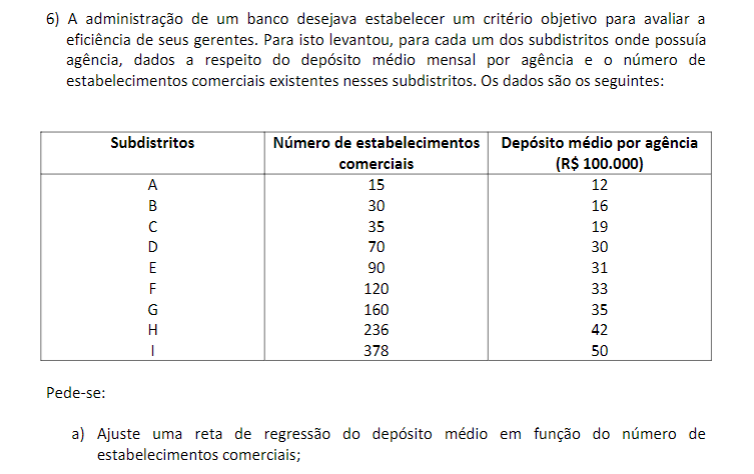

### Criando os dados necessários

In [1]:
# Pegando uma biblioteca de manipulação de dados em python
import pandas as pd

In [13]:
# Escrevendo os dados em uma estrutura que se chama DataFrame. Ele é um formato que permite que 
# façamos manipulações a esses dados

dados = {'Subdistritos': ['A','B','C','D','E','F','G','H','I'],
        'N_estab':[15,30,35,70,90,120,160,236,378],
        'Deposito_medio':[12,16,19,30,31,33,35,42,50]}

dados = pd.DataFrame(dados)
dados

,Subdistritos,N_estab,Deposito_medio
0,A,15,12
1,B,30,16
2,C,35,19
3,D,70,30
4,E,90,31
5,F,120,33
6,G,160,35
7,H,236,42
8,I,378,50


In [26]:
# Criando as colunas que precisamos para fazer os cálculos

dados['X_vezes_Y'] = dados['N_estab']*dados['Deposito_medio']
dados['X_quadrado'] = dados['N_estab']**2
dados

,Subdistritos,N_estab,Deposito_medio,X_vezes_Y,X_quadrado
0,A,15,12,180,225
1,B,30,16,480,900
2,C,35,19,665,1225
3,D,70,30,2100,4900
4,E,90,31,2790,8100
5,F,120,33,3960,14400
6,G,160,35,5600,25600
7,H,236,42,9912,55696
8,I,378,50,18900,142884


### Calculando B1

A fórmula de B1 é:

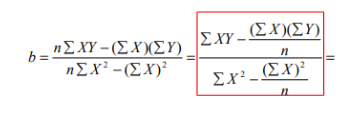

In [28]:
# Pegando os somatórios das colunas que precisamos com a função sum()

somatorio_XY = dados['X_vezes_Y'].sum()
print(f'Somatório de X vezes Y: {somatorio_XY}')

somatorio_X = dados['N_estab'].sum()
print(f'Somatório de X: {somatorio_X}')

somatorio_Y = dados['Deposito_medio'].sum()
print(f'Somatório de Y: {somatorio_Y}')

somatorio_X_quadrado = dados['X_quadrado'].sum()
print(f'Somatório de X ao quadrado: {somatorio_X_quadrado}')

n = 9

Somatório de X vezes Y: 44587
Somatório de X: 1134
Somatório de Y: 268
Somatório de X ao quadrado: 253930


In [15]:
# Fazendo a parte de cima da equação
cima = somatorio_XY - [(somatorio_X*somatorio_Y)/n]
cima[0]

10819.0

In [16]:
# Fazendo a parte de baixo da equação
baixo = somatorio_X_quadrado - [(somatorio_X**2)/n]
baixo[0]

111046.0

In [20]:
B1 = cima/baixo
B1 = B1[0]
print(f'B1 estimado: {B1.round(4)}')

B1 estimado: 0.0974


### Calculando a

A fórmula de a é:

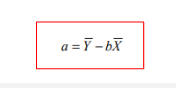

In [32]:
# Pegando a média de X e de Y
media_x = dados['N_estab'].mean()
print(f'Média de X: {media_x}')

media_y = dados['Deposito_medio'].mean()
print(f'Média de Y: {round(media_y,4)}')

Média de X: 126.0
Média de Y: 29.7778


In [34]:
a = media_y - B1*media_x
a.round(4)

17.5018

### Reta final

Nossa reta com os parâmetros estimados é: 
                                            
                                            Y = 17.502 + 0.097X

In [39]:
print(f'Y = {a.round(3)} + {B1.round(3)}X')

Y = 17.502 + 0.097X


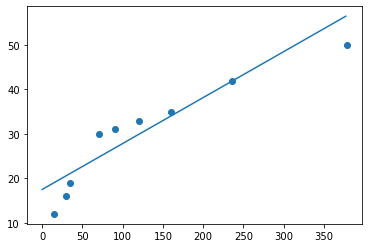

In [48]:
## Colocando em um gráfico
import matplotlib.pyplot as plt
import numpy as np
ax = plt.scatter(dados['N_estab'], dados['Deposito_medio'])
x = np.linspace(0,400,378)
Y = a + B1*x
plt.plot(Y)
plt.show()

### Comparando meus resultados com o Sci Kit Learn

O Sci Kit Learn é uma biblioteca que possui diversas funções de criação de modelos estatísticos. Dentre elas, o modelo de regressão linear, que faz todo o passo a passo de uma regressão nos nossos dados com apenas algumas linhas.

In [49]:
from sklearn.linear_model import LinearRegression

In [54]:
# Passando nossos dados

X = np.array(dados['N_estab']).reshape((-1, 1))
Y = np.array(dados['Deposito_medio'])

In [60]:
# Ajustando nosso modelo aos dados

model = LinearRegression().fit(X, Y)

In [62]:
# Pegando os resultados
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 17.50183807711318
slope: [0.09742809]


### Conclusão

Conseguimos nos aproximar bastante dos parâmetros estimados pelo Sci-Kit Learn através de nossos cálculos!!